In [1]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer #  TF-IDF to vectorize words 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time
# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, 
                        module='gensim')
import gensim
import os

!pip install -q textdistance
import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm
tqdm.pandas()
import re
import spacy
import numpy as np
import seaborn as sns
from spacy.language import Language
from spacy import displacy
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('D:\OneDrive - NITT\Custom_Download\data_for_topic_m.csv')

In [4]:
data = data['clean_tweet_wt_stem']

In [5]:
data.dropna(inplace=True)

In [6]:
data

0      tks reply psp employees blamed late flight dep...
1               spending birthday night dal dca get home
2            enter every contest destinationdragons lose
3      tried doesnt help much reservation seems overw...
4      flight cancelled flightled yesterday early aft...
                             ...                        
561    sounds like usairways planned better since wea...
562    line responses waiting tomorrow morning flight...
563    considering stuck newark virtually sleep 30 ho...
564    seat disgusting old dirty going refurbish plan...
565               helping since bunch us trying get time
Name: clean_tweet_wt_stem, Length: 565, dtype: object

  0%|          | 0/565 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

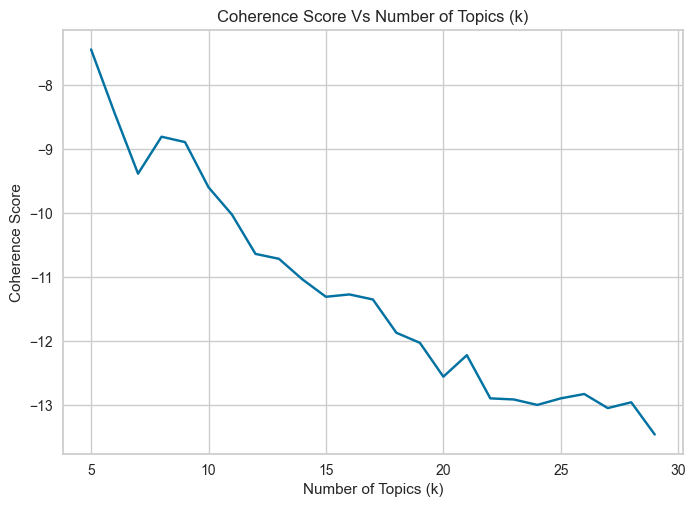

No of Topic Selected by Coherence Score: 5


In [7]:
docs = [] # Initializing list
for tweet in tqdm(data): # loop through tweets 
    docs.append(tweet)  # add to the list

# Merge the words into a single string 
vocab_size = len(set(" ".join(docs).split(" ")))

# Converting into tokens
tokens = [text.split() for text in docs]

# Storing using class to map words to integers ids
id2word = Dictionary(tokens)

# Storing into corpus using method to generate 
# no. of times word appears
corpus = [id2word.doc2bow(text) for text in tokens]

#Setting up LDA model

coh = []
for i in tqdm(range(5,30)):
    model = LdaModel(corpus, i, id2word,random_state=42)
    cm = CoherenceModel(model=model, corpus=corpus, 
                        coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    coh.append(coherence)

# Setting up ploting details 
plt.plot(range(5,30),coh)
plt.title('Coherence Score Vs Number of Topics (k)')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Coherence Score')
plt.show()

# calculating for different numbers of topics
# 'np.array(coh).argmax()' finds the index of the maximum coherence score
# '+ 5' is added to the index, assuming the number of topics started from 5


k_topic = np.array(coh).argmax() + 5

print('No of Topic Selected by Coherence Score:',k_topic)

In [8]:
tfidf_featurizer = TfidfVectorizer(max_features=vocab_size, 
                                       max_df=0.95, stop_words='english')

docs_tfidf = tfidf_featurizer.fit_transform(docs) # Transform to TF-IDF

In [9]:
# !pip install pyLDAvis==2.1.2

In [10]:
import pyLDAvis.sklearn

In [11]:
pyLDAvis.enable_notebook() # To enable the visualization on the notebook

In [12]:
LDA_model = LatentDirichletAllocation(n_components=k_topic, 
                                          random_state=42)
LDA_model.fit(docs_tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [13]:
panel = pyLDAvis.sklearn.prepare(LDA_model, docs_tfidf, tfidf_featurizer) # Create the panel for the visualization
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.040974 -0.035258       1        1  21.109038
4      0.021975  0.017117       2        1  20.103876
1     -0.048621 -0.032461       3        1  20.095925
0     -0.013001  0.037915       4        1  19.844032
3     -0.001327  0.012688       5        1  18.847129, topic_info=           Term      Freq     Total Category  logprob  loglift
1818    waiting  4.000000  4.000000  Default  30.0000  30.0000
360   cancelled  5.000000  5.000000  Default  29.0000  29.0000
1668     thanks  3.000000  3.000000  Default  28.0000  28.0000
802        gate  3.000000  3.000000  Default  27.0000  27.0000
871        help  5.000000  5.000000  Default  26.0000  26.0000
...         ...       ...       ...      ...      ...      ...
1289      plane  0.789258  4.424636   Topic5  -5.9372  -0.0550
1686       time  0.775778  4.486261   Topic5  -5.9544  -0.0861
747     flights  0.701648  3.910856   Topic5  -6.0548  -0.0493
178     airline  0.671209  3.345382   Topic5  -6.0992   0.0626
1132      miles  0.576380  1.670794   Topic5  -6.2515   0.6045

[324 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         3  0.527713        10
45        1  0.814752        20
155       3  0.806915  actually
160       2  1.072324  advisory
166       1  0.455843    agents
...     ...       ...       ...
1831      4  0.396876       way
1836      4  0.484955   website
1859      1  0.635039   working
1863      2  1.109411     worse
1883      1  0.577106       yes

[245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4])

In [14]:
pyLDAvis.save_html(panel, 'lda.html')